In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from math import sqrt
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaed = files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [3]:
cc_data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cc_data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
print(cc_data.Quarter[1][3:])
print(cc_data.Quarter[1][:2])

86
Q2


In [5]:
year = []
month = []
for i in cc_data['Quarter']:
    year.append('19'+i[3:])
    if i[:2] == 'Q1':
        month.append('jan')
    elif i[:2] == 'Q2':
        month.append('apr')
    elif i[:2] == 'Q3':
        month.append('jul')
    else:
        month.append('oct')

data = cc_data.copy()
data['year'] = year
data['month'] = month
data['t'] = range(1, len(data)+1)
data['t_squared'] = data['t']**2
data.head()


,Quarter,Sales,year,month,t,t_squared
0,Q1_86,1734.827000,1986,jan,1,1
1,Q2_86,2244.960999,1986,apr,2,4
2,Q3_86,2533.804993,1986,jul,3,9
3,Q4_86,2154.962997,1986,oct,4,16
4,Q1_87,1547.818996,1987,jan,5,25


In [6]:
data

,Quarter,Sales,year,month,t,t_squared
0,Q1_86,1734.827000,1986,jan,1,1
1,Q2_86,2244.960999,1986,apr,2,4
2,Q3_86,2533.804993,1986,jul,3,9
3,Q4_86,2154.962997,1986,oct,4,16
4,Q1_87,1547.818996,1987,jan,5,25
5,Q2_87,2104.411995,1987,apr,6,36
6,Q3_87,2014.362999,1987,jul,7,49
7,Q4_87,1991.746998,1987,oct,8,64
8,Q1_88,1869.049999,1988,jan,9,81
9,Q2_88,2313.631996,1988,apr,10,100


In [7]:
data.shape

(42, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quarter    42 non-null     object 
 1   Sales      42 non-null     float64
 2   year       42 non-null     object 
 3   month      42 non-null     object 
 4   t          42 non-null     int64  
 5   t_squared  42 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.1+ KB


In [9]:
data['year']= pd.to_datetime(data['year'])

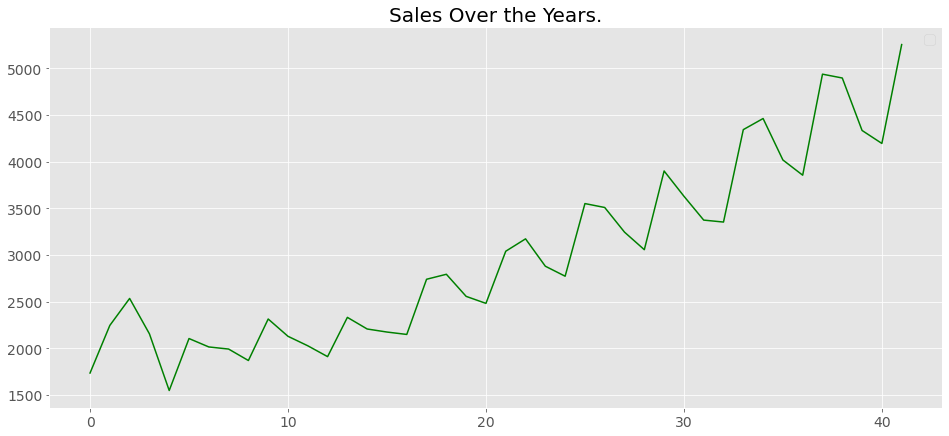

In [10]:
plt.style.use('ggplot')
plt.title("Sales Over the Years.",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels ='Sales', fontsize=14)
data['Sales'].plot(figsize=(16,7),c='g');

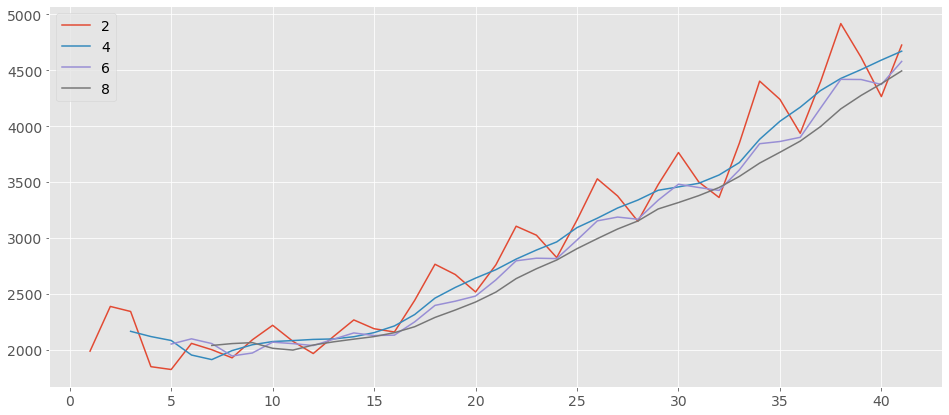

In [11]:
for i in range(2,10,2):
    data["Sales"].rolling(i).mean().plot(label=str(i),figsize=(16,7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=(14));

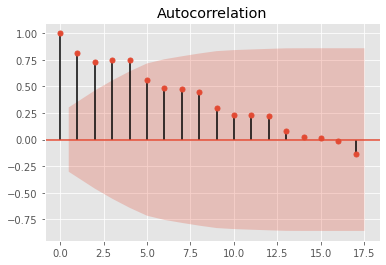

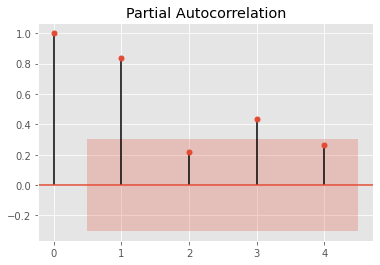

In [12]:
tsa_plots.plot_acf(data['Sales'])
tsa_plots.plot_pacf(data['Sales'], lags = 4)
plt.show()

In [13]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

In [14]:
changes = cc_data.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
cc_data['quater'] = pd.to_datetime(changes).dt.strftime('%b-%Y')
cc_data= cc_data.drop(['Quarter'], axis=1)
cc_data.reset_index(inplace=True)
cc_data['quater'] = pd.to_datetime(cc_data['quater'])
cc_data = cc_data.set_index('quater')
cc_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


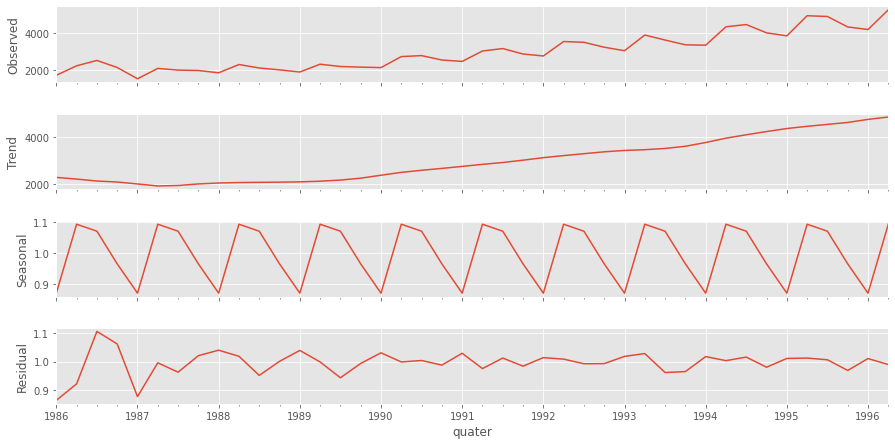

In [15]:
seasonal_decompose(cc_data['Sales'])

In [16]:
X = data['Sales'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=0);

In [17]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   26
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -172.036
Method:                       css-mle   S.D. of innovations            163.191
Date:                Sun, 24 Apr 2022   AIC                            358.071
Time:                        06:16:41   BIC                            366.878
Sample:                             1   HQIC                           360.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8414     26.509      1.578      0.130     -10.115      93.798
ar.L1.D.y     -0.1479      0.195     -0.758      0.457      -0.530       0.234
ar.L2.D.y     -0.3127      0.157     -1.996      0.0

In [18]:
model_fit.forecast(1)


(array([3135.5840308]),
 array([163.19116497]),
 array([[2815.73522487, 3455.43283673]]))

In [19]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs));

predicted=3135.584031, expected=3243.859993
predicted=3188.846714, expected=3056.000000
predicted=3734.223489, expected=3899.000000
predicted=3782.620723, expected=3629.000000
predicted=3355.125669, expected=3373.000000
predicted=3297.218680, expected=3352.000000
predicted=4112.813346, expected=4342.000000
predicted=3961.042556, expected=4461.000000
predicted=4130.787257, expected=4017.000000
predicted=3912.793635, expected=3854.000000
predicted=4687.043487, expected=4936.000000
predicted=4970.519511, expected=4895.000000
predicted=4384.040079, expected=4333.000000
predicted=4207.689149, expected=4194.000000
predicted=5261.674346, expected=5253.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [20]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 31525.434


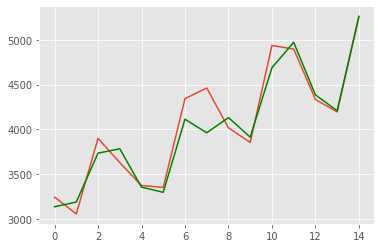

In [21]:
plt.plot(test)
plt.plot(predictions, color='g')
plt.show()

In [22]:
data.head()

,Quarter,Sales,year,month,t,t_squared
0,Q1_86,1734.827000,1986-01-01,jan,1,1
1,Q2_86,2244.960999,1986-01-01,apr,2,4
2,Q3_86,2533.804993,1986-01-01,jul,3,9
3,Q4_86,2154.962997,1986-01-01,oct,4,16
4,Q1_87,1547.818996,1987-01-01,jan,5,25


In [23]:
data['Quarters'] = 0
data['Year'] = 0
for i in range(42):
    p = data["Quarter"][i]
    data['Quarters'][i]= p[0:2]
    data['Year'][i]= p[3:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
Quarters_Dummies = pd.DataFrame(pd.get_dummies(data['Quarters']))
data = pd.concat([data,Quarters_Dummies],axis = 1)
data['log_sales'] =  np.log(data["Sales"])

In [25]:
final_data = data.drop(['year','month'],axis=1)
final_data.head()

,Quarter,Sales,t,t_squared,Quarters,Year,Q1,Q2,Q3,Q4,log_sales
0,Q1_86,1734.827000,1,1,Q1,86,1,0,0,0,7.458663
1,Q2_86,2244.960999,2,4,Q2,86,0,1,0,0,7.716443
2,Q3_86,2533.804993,3,9,Q3,86,0,0,1,0,7.837477
3,Q4_86,2154.962997,4,16,Q4,86,0,0,0,1,7.675529
4,Q1_87,1547.818996,5,25,Q1,87,1,0,0,0,7.344602


In [26]:
Train, Test = final_data.head(32),final_data.tail(10)

In [27]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767116

In [28]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['log_sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

3954.3132012557144

In [29]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.735735540752

In [30]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858358

In [31]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['t','t_squared','Q1','Q2','Q3']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.35107711286423

In [32]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['log_sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2495.3224714772045

In [33]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test[['t','Q1','Q2','Q3']]))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['log_sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

3947.0985744014997

In [34]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
2,rmse_Quad,457.735736
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,2495.322471
6,rmse_Mult_add_sea,3947.098574
1,rmse_Exp,3954.313201


In [35]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [36]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=final_data).fit()
pred_final = pd.Series(final_model.predict(final_data[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(final_data['Sales'], pred_final)
rmse_final_model

159.05522576522478

In [37]:
pred_df = pd.DataFrame({'Actual' : final_data.Sales, 'Predicted' : pred_final})

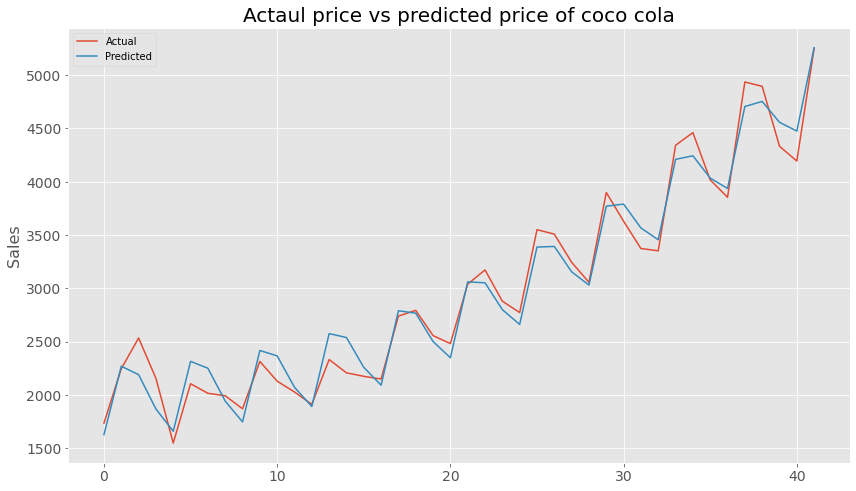

In [38]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Actaul price vs predicted price of coco cola', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.plot(final_data['Sales'],label='Actual')
plt.plot(pred_df['Predicted'],label='Predicted')
plt.legend();